In [1]:
import sys
import os
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

Pipeline de prédiction pour les modèles de régression

In [3]:
from ml_models.pipeline_for_regression import run_model

model, X_train, df_stats, df_test = run_model('catboost', use_feature_engineering=True, use_bet_odds=True)

/Users/liem_nguyen/PycharmProjects/horse_racings/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      63531 non-null  category
 1   config                     63531 non-null  category
 2   surface                    63531 non-null  category
 3   distance                   63531 non-null  category
 4   going                      63531 non-null  category
 5   horse_ratings              63531 non-null  category
 6   race_class                 63531 non-null  category
 7   horse_id                   63531 non-null  int64   
 8   horse_age                  63531 non-null  int64   
 9   horse_country              63531 non-null  category
 10  horse_type                 63531 non-null  category
 11  horse_rating               63531 non-null  category
 12  declared_weight            63531 non-null  float64 
 13  actual_weight              63531 non-

In [4]:
df_stats.head(14)

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.330461,0,False
1,5078,1598,0,0.090465,0,False
2,5078,1514,0,0.315104,0,False
3,5078,3673,0,0.271612,0,False
4,5078,627,1,0.626395,0,False
5,5078,1271,0,0.176646,0,False
6,5078,833,0,0.528711,0,False
7,5078,3751,0,0.286361,0,False
8,5078,1918,0,0.776901,1,False
9,5078,1615,0,0.426834,0,False


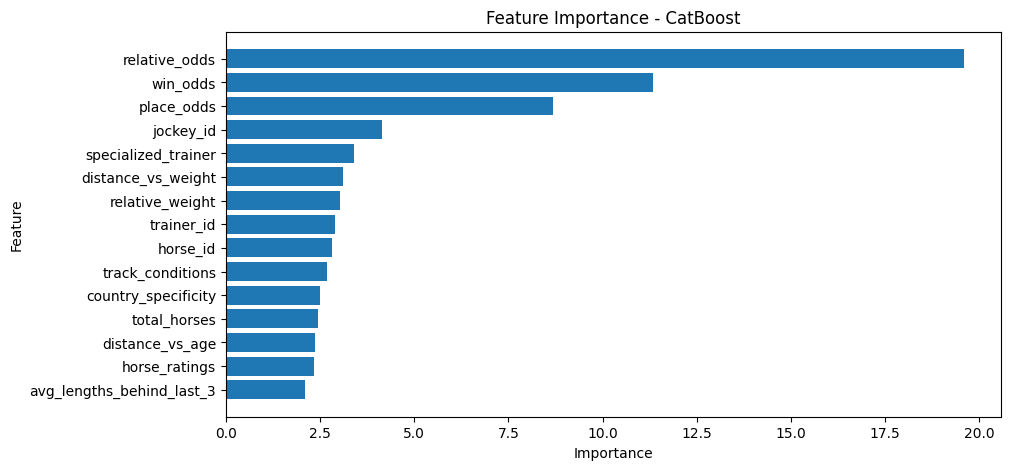

In [5]:
from metrics.feature_importance import plot_feature_importance

importance_df = plot_feature_importance(model, X_train)

XGBoost

In [6]:
#model, X_train, df_stats = run_model('xgboost', use_feature_engineering=True, use_bet_odds=True)

In [7]:
df_stats.head(14)

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.330461,0,False
1,5078,1598,0,0.090465,0,False
2,5078,1514,0,0.315104,0,False
3,5078,3673,0,0.271612,0,False
4,5078,627,1,0.626395,0,False
5,5078,1271,0,0.176646,0,False
6,5078,833,0,0.528711,0,False
7,5078,3751,0,0.286361,0,False
8,5078,1918,0,0.776901,1,False
9,5078,1615,0,0.426834,0,False
